In [3]:
import pandas as pd
import numpy as np

In [4]:
import sklearn

C:\Users\shreyansh\Anaconda3\envs\virtual_env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\shreyansh\Anaconda3\envs\virtual_env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\shreyansh\Anaconda3\envs\virtual_env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
df_org=pd.read_csv('train.csv')

In [6]:
df_test=pd.read_csv('test.csv')

In [7]:
df_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
df=df_org.copy()

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
from sklearn.impute import SimpleImputer

C:\Users\shreyansh\Anaconda3\envs\virtual_env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\shreyansh\Anaconda3\envs\virtual_env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\shreyansh\Anaconda3\envs\virtual_env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
imp={}

In [12]:
SI=SimpleImputer(add_indicator=True)

In [13]:
cols=['Age']

In [14]:
for col in cols:
    co=[]
    SI.fit(df[[col]])
    data=SI.transform(df[[col]])
    #print(data)
    co.append(f'{col}')
    co.append(f'{col}_ind')
    df1=pd.DataFrame(data,columns=co)
    #print(df1)
    df.drop(col,axis=1,inplace=True)
    df=pd.concat([df,df1],axis=1)

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Age_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.000000,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.000000,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.000000,0.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.000000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.000000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,29.699118,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.000000,0.0


In [16]:
#SI.fit(df[["Age"]])

In [17]:
#df1=SI.transform(df[['Age']])

In [18]:
#df1_1=pd.DataFrame(df1,columns=['Age','Age_ind'])

In [19]:
#df.drop('Age',axis=1,inplace=True)

In [20]:
#pd.concat([df,df1_1],axis=1)

In [21]:
#SI.indicator_

In [22]:
from sklearn.impute import SimpleImputer
def numeric_imputaion(df,col_num,col_cat,dict_values=None):
    
    dict_value={}
    co=[]
    
    if dict_values == None :
        print("inside")
        if col_num == None:
            cols=list(df.columns)
        for col in col_num:
            co.clear()
            SI=SimpleImputer()
            
            print("inside for")
            SI.fit(df[[col]])
            data=SI.transform(df[[col]])
            print("below transform")
            dict_value[col]=SI.statistics_[0]
            print("below dict")
            co.append(f'{col}')
            #co.append(f'{col}_ind')
            print('below co append')
            print(data)
            df1=pd.DataFrame(data,columns=co)
            print('df1')
            #df.drop(col,axis=1,inplace=True)
            #df.reset_index(drop=True, inplace=True)
            #df1.reset_index(drop=True, inplace=True)
            df.drop(col,axis=1,inplace=True)
            df=pd.concat([df,df1],axis=1)
            #data=np.delete(data)
            
        for col in col_cat:
            co=[]
            SI=SimpleImputer(strategy='most_frequent')
            SI.fit(df[[col]])
            data=SI.transform(df[[col]])
            dict_value[col]=SI.statistics_[0]
            co.append(f'{col}')
            #co.append(f'{col}_ind')
            df1=pd.DataFrame(data,columns=co)
            df.drop(col,axis=1,inplace=True)
            df=pd.concat([df,df1],axis=1)
                                 
    else:
        print("inside else")
        df.fillna(dict_values,axis=1,inplace=True)
            
            
    return (df,dict_value)
        
    

In [23]:
cols=['Age','Fare']
cols_cat=['Cabin','Embarked']

In [24]:
#import pdb

In [25]:
#pdb.run()

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,Age_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.000000,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.000000,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.000000,0.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.000000,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.000000,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,29.699118,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.000000,0.0


In [27]:
df=df_org.copy()

In [28]:
df,dl=numeric_imputaion(df,cols,cols_cat)

inside
inside for
below transform
below dict
below co append
[[22.        ]
 [38.        ]
 [26.        ]
 [35.        ]
 [35.        ]
 [29.69911765]
 [54.        ]
 [ 2.        ]
 [27.        ]
 [14.        ]
 [ 4.        ]
 [58.        ]
 [20.        ]
 [39.        ]
 [14.        ]
 [55.        ]
 [ 2.        ]
 [29.69911765]
 [31.        ]
 [29.69911765]
 [35.        ]
 [34.        ]
 [15.        ]
 [28.        ]
 [ 8.        ]
 [38.        ]
 [29.69911765]
 [19.        ]
 [29.69911765]
 [29.69911765]
 [40.        ]
 [29.69911765]
 [29.69911765]
 [66.        ]
 [28.        ]
 [42.        ]
 [29.69911765]
 [21.        ]
 [18.        ]
 [14.        ]
 [40.        ]
 [27.        ]
 [29.69911765]
 [ 3.        ]
 [19.        ]
 [29.69911765]
 [29.69911765]
 [29.69911765]
 [29.69911765]
 [18.        ]
 [ 7.        ]
 [21.        ]
 [49.        ]
 [29.        ]
 [65.        ]
 [29.69911765]
 [21.        ]
 [28.5       ]
 [ 5.        ]
 [11.        ]
 [22.        ]
 [38.        ]
 [45.    

In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Age,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,22.000000,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,38.000000,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,26.000000,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,35.000000,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,35.000000,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,27.000000,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,19.000000,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,29.699118,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,26.000000,30.0000,C148,C


In [30]:
dl

{'Age': 29.69911764705882,
 'Fare': 32.204207968574636,
 'Cabin': 'B96 B98',
 'Embarked': 'S'}

In [31]:
#df_t,d=numeric_imputaion(df_test,cols,dl)

In [32]:
#imp['Age']=df['Age'].mean()

In [33]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Age            0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [34]:
df_test.fillna(dl,inplace=True)

In [35]:
pd.get_dummies(df,columns=['Embarked','Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,Cabin_B42,Cabin_B49,Cabin_B5,Cabin_B50,Cabin_B51 B53 B55,Cabin_B57 B59 B63 B66,Cabin_B58 B60,Cabin_B69,Cabin_B71,Cabin_B73,Cabin_B77,Cabin_B78,Cabin_B79,Cabin_B80,Cabin_B82 B84,Cabin_B86,Cabin_B94,...,Cabin_C93,Cabin_C95,Cabin_C99,Cabin_D,Cabin_D10 D12,Cabin_D11,Cabin_D15,Cabin_D17,Cabin_D19,Cabin_D20,Cabin_D21,Cabin_D26,Cabin_D28,Cabin_D30,Cabin_D33,Cabin_D35,Cabin_D36,Cabin_D37,Cabin_D45,Cabin_D46,Cabin_D47,Cabin_D48,Cabin_D49,Cabin_D50,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,22.000000,7.2500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,38.000000,71.2833,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,26.000000,7.9250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,35.000000,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,35.000000,8.0500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,27.000000,13.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,19.000000,30.0000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,29.699118,23.4500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [36]:
ordinal_dictionary={'male':1,'female':0}

In [37]:
### get dummy or one hot encoding
from sklearn.preprocessing import OrdinalEncoder

In [38]:
gender=['female','male']

In [39]:
OE=OrdinalEncoder(categories=[gender])

In [40]:
OE.fit(df[['Sex']])

OrdinalEncoder(categories=[['female', 'male']], dtype=<class 'numpy.float64'>)

In [41]:
df['Sex']=OE.transform(df[['Sex']])

In [42]:
#df.drop('Sex1',inplace=True,axis=1)

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Age,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,1,0,A/5 21171,22.000000,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,1,0,PC 17599,38.000000,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,0,0,STON/O2. 3101282,26.000000,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,1,0,113803,35.000000,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,0,0,373450,35.000000,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,0,0,211536,27.000000,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,0,0,112053,19.000000,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,1,2,W./C. 6607,29.699118,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",1.0,0,0,111369,26.000000,30.0000,C148,C


In [44]:
#def dummy(df,cols):

In [45]:
#def encoding(df,label_enc_col,label_values,one_hot_col):
'''one hot encoder , label encoder and ordinal encoder care clubbed together'''

'one hot encoder , label encoder and ordinal encoder care clubbed together'

In [46]:
drop_columns=['PassengerId','Name','Ticket','Cabin','Survived']

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
ohe=OneHotEncoder(sparse=False)

In [49]:
ohe.fit(df[['Embarked']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [50]:
dd=ohe.transform(df[['Embarked']])

In [51]:
ohe.categories_

[array(['C', 'Q', 'S'], dtype=object)]

In [52]:
df


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Age,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,1,0,A/5 21171,22.000000,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,1,0,PC 17599,38.000000,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,0,0,STON/O2. 3101282,26.000000,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,1,0,113803,35.000000,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,0,0,373450,35.000000,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1.0,0,0,211536,27.000000,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",0.0,0,0,112053,19.000000,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,1,2,W./C. 6607,29.699118,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",1.0,0,0,111369,26.000000,30.0000,C148,C


In [53]:
df=pd.get_dummies(df,columns=['Embarked'])

In [54]:
drop_columns=['PassengerId','Name','Ticket','Cabin','Survived']

In [55]:
y=df['Survived']

In [56]:
X=df.drop(columns=drop_columns,axis=1)

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [58]:
ss=StandardScaler()

In [59]:
ss.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
X_cols=list(X.columns)

In [61]:
X=ss.transform(X)

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

In [63]:
y_test.shape

(179,)

In [64]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\shreyansh\Anaconda3\envs\virtual_env\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [65]:
rfc=RandomForestClassifier()

In [66]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
y_predict=rfc.predict(X_test)

In [68]:
y_prob_predict=rfc.predict_proba(X_train)

In [69]:
y_prob_predict

array([[0.97      , 0.03      ],
       [0.03      , 0.97      ],
       [0.1       , 0.9       ],
       ...,
       [0.96666667, 0.03333333],
       [0.02      , 0.98      ],
       [0.79      , 0.21      ]])

In [70]:
rfc.feature_importances_

array([0.08977601, 0.25321744, 0.05154134, 0.03943737, 0.25732205,
       0.27334984, 0.01675844, 0.00654177, 0.01205575])

In [71]:
feature_importance=dict(zip(X_cols,rfc.feature_importances_))

In [73]:
#feature_importance['imp']
feature_importance

{'Pclass': 0.08977600620865361,
 'Sex': 0.25321744229772636,
 'SibSp': 0.05154133802837329,
 'Parch': 0.03943736819815205,
 'Age': 0.25732204548055315,
 'Fare': 0.27334983783078853,
 'Embarked_C': 0.01675843812451228,
 'Embarked_Q': 0.0065417729113504165,
 'Embarked_S': 0.0120557509198903}

In [74]:
feature_importance=pd.DataFrame.from_dict({'feature':X_cols,'imp':rfc.feature_importances_})

In [75]:
feature_importance.sort_values('imp')

,feature,imp
7,Embarked_Q,0.006542
8,Embarked_S,0.012056
6,Embarked_C,0.016758
3,Parch,0.039437
2,SibSp,0.051541
0,Pclass,0.089776
1,Sex,0.253217
4,Age,0.257322
5,Fare,0.273350


In [76]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import SGDClassifier

In [77]:
sgdc=SGDClassifier()

In [78]:
cross_val_score(rfc,X_train,y_train,cv=5,scoring='roc_auc')

array([0.88023399, 0.8631171 , 0.86482558, 0.90469269, 0.79246262])

In [79]:
y_prob=cross_val_predict(rfc,X_train,y_train,cv=5,method='predict_proba')

In [80]:
y_prob

array([[0.8 , 0.2 ],
       [0.08, 0.92],
       [0.42, 0.58],
       ...,
       [0.99, 0.01],
       [0.06, 0.94],
       [0.51, 0.49]])

In [81]:
#precision,recall,threshold=precision_recall_curve(y_train,y_prob_predict[0])

In [82]:
yscore=cross_val_predict(sgdc,X_train,y_train,cv=3,method='decision_function')

In [83]:
#yscore

In [84]:
precisions, recalls, thresholds = precision_recall_curve(y_train, yscore)

In [85]:
yprob_t=y_prob[:,1]

In [86]:
yprob=yprob_t.reshape(-1,1)

In [87]:
p1,r1,t1=precision_recall_curve(y_train,yprob)

In [88]:
#t1

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc = 'best')

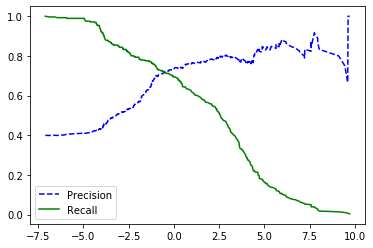

In [91]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

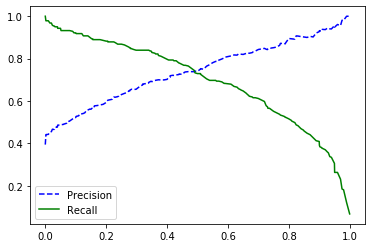

In [92]:
plot_precision_recall_vs_threshold(p1, r1, t1)
plt.show()

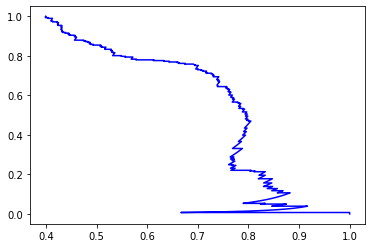

In [93]:
plt.plot(precisions,recalls,"b",label="xaxis")

In [94]:
type(precisions)

numpy.ndarray

In [95]:
thresholds[ np.argmax(precisions>=.90)]

7.7635787068198905

In [96]:
from sklearn.metrics import roc_curve

In [97]:
fpr,tpr,threshold_roc=roc_curve(y_train,yscore)

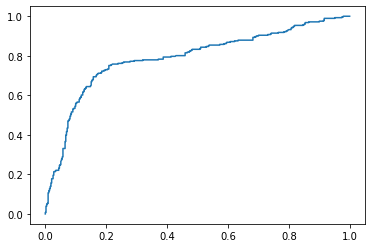

In [98]:
plt.plot(fpr,tpr)

In [99]:
from sklearn.metrics import roc_auc_score

In [100]:
roc_auc_score(y_train,yscore)

0.7897672383185672

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [102]:
scores=cross_val_score(rfc,X_train,y_train,cv=5)

In [103]:
scores

array([0.83216783, 0.78321678, 0.78169014, 0.85915493, 0.76760563])

In [104]:
param_grid={'n_estimator':[200,400,600,800,1000]}

In [129]:
lr_binary=LogisticRegression(penalty='l2',C=1.0,solver='liblinear',max_iter=100,multi_class='auto')

In [131]:
lr_param={'C':[.1,.3,.5,.7,.9,1,2,4,6,8,10]}
lr_grid=GridSearchCV(estimator=lr_binary,param_grid=lr_param,cv=5)

In [132]:
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 4, 6, 8, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [133]:
lr_grid.cv_results_

{'mean_fit_time': array([0.02655959, 0.00224795, 0.00139623, 0.00119672, 0.00099754,
        0.0009973 , 0.0009973 , 0.00099726, 0.0009973 , 0.00099759,
        0.0009974 ]),
 'std_fit_time': array([4.26524461e-02, 1.07752014e-03, 4.88577679e-04, 3.99065089e-04,
        2.61174468e-07, 2.13248060e-07, 1.50789149e-07, 1.78416128e-07,
        1.50789149e-07, 2.78041453e-07, 2.43140197e-07]),
 'mean_score_time': array([0.00200748, 0.00039997, 0.00019951, 0.00019946, 0.00059824,
        0.00039892, 0.00039897, 0.00039897, 0.00019946, 0.00039878,
        0.00039892]),
 'std_score_time': array([0.00156648, 0.00048987, 0.00039902, 0.00039892, 0.00048846,
        0.00048858, 0.00048864, 0.00048864, 0.00039892, 0.0004884 ,
        0.00048858]),
 'param_C': masked_array(data=[0.1, 0.3, 0.5, 0.7, 0.9, 1, 2, 4, 6, 8, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fill_value='?',
             dtype=object),
 'params

In [108]:
from keras import models
from keras import layers

In [110]:
network=models.Sequential()

In [111]:
X.shape

(891, 9)

In [112]:
network.add(layers.Dense(512,activation='relu',input_shape=(9,)))
network.add(layers.Dense(1,activation='sigmoid'))

In [121]:
network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [122]:
network.fit(X_train,y_train,epochs=5)

Epoch 1/5
712/712 [==============================] - 0s 516us/step - loss: 0.5591 - accuracy: 0.7317
Epoch 2/5
712/712 [==============================] - 0s 35us/step - loss: 0.4624 - accuracy: 0.7992
Epoch 3/5
712/712 [==============================] - 0s 50us/step - loss: 0.4405 - accuracy: 0.7992
Epoch 4/5
712/712 [==============================] - 0s 62us/step - loss: 0.4279 - accuracy: 0.8090
Epoch 5/5
712/712 [==============================] - 0s 66us/step - loss: 0.4232 - accuracy: 0.8020


In [123]:
test_loss,test_acc=network.evaluate(X_test,y_test)

179/179 [==============================] - 0s 100us/step


In [124]:
test_loss

0.4243287798745672

In [125]:
test_acc

0.832402229309082